In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

In [45]:
dataset = pd.read_csv('data.csv')D
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [33]:
y_train = dataset['diagnosis']

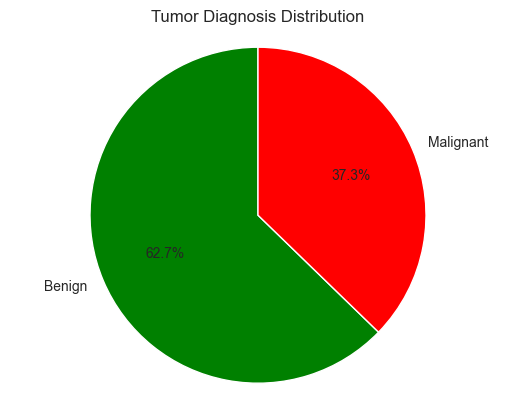

In [34]:
# Value counts
counts = y_train.value_counts()

# Labels and colors
labels = ['Benign', 'Malignant']
colors = ['green', 'red']

# Pie chart
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Tumor Diagnosis Distribution')
plt.axis('equal')
plt.show()


In [35]:
# Step 1: Convert diagnosis to numbers
dataset['diagnosis'] = dataset['diagnosis'].map({'M': 1, 'B': 0})

# Step 2: Assign diagnosis to y
y = dataset['diagnosis']

# Step 3: Drop diagnosis from X
X = dataset.drop(['id', 'Unnamed: 32', 'diagnosis'], axis=1)


In [36]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only on training data
X_train = scaler.fit_transform(X_train)

# Use same transform on test data
X_test = scaler.transform(X_test)


In [38]:
# Import ML models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC()
}

# Train models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully.")


Logistic Regression trained successfully.
Decision Tree trained successfully.
Random Forest trained successfully.
KNN trained successfully.
SVM trained successfully.


In [39]:
from sklearn.metrics import classification_report

# Evaluate each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"--- {name} ---")
    print(classification_report(y_test, y_pred))


--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

--- Decision Tree ---
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        72
           1       0.93      0.93      0.93        42

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
we

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid,
    cv=5,                 # 5-fold cross-validation
    scoring='f1',         # can also use 'accuracy' or 'recall'
    verbose=1,
    n_jobs=-1             # use all available cores
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report
print("Best SVM Model Evaluation:\n")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best SVM Model Evaluation:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [41]:
# Define parameter grid
param_dist = {
    'C': np.logspace(-3, 2, 10),
    'gamma': ['scale', 'auto'] + list(np.logspace(-4, 1, 6)),
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# Create SVM model
svm_model = SVC()

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    svm_model,
    param_distributions=param_dist,
    n_iter=20,       # number of combinations to try
    cv=5,
    scoring='f1',
    random_state=42,
    n_jobs=-1
)

# Fit model
random_search.fit(X_train, y_train)

# Best model from random search
best_random_model = random_search.best_estimator_

# Evaluate
y_pred = best_random_model.predict(X_test)

print("Best Parameters from RandomizedSearchCV:", random_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

Best Parameters from RandomizedSearchCV: {'kernel': 'linear', 'gamma': np.float64(0.0001), 'C': np.float64(0.046415888336127795)}
Accuracy: 0.9824561403508771
Precision: 1.0
Recall: 0.9523809523809523
F1-Score: 0.975609756097561


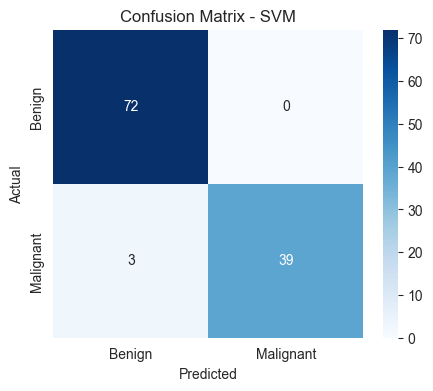

Accuracy: 0.9736842105263158

Classification Report:
              precision    recall  f1-score   support

      Benign       0.96      1.00      0.98        72
   Malignant       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [42]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predict using best SVM model
y_pred = best_model.predict(X_test)

# ✅ 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

# ✅ 2. Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# ✅ 3. Classification Report (Precision, Recall, F1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))


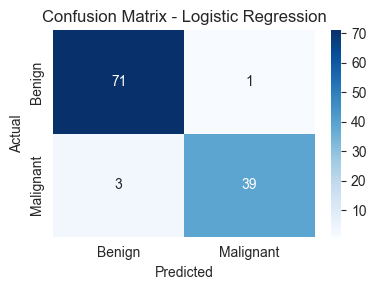

📊 Classification Report - Logistic Regression
Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

      Benign       0.96      0.99      0.97        72
   Malignant       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

---------------------------------------------------



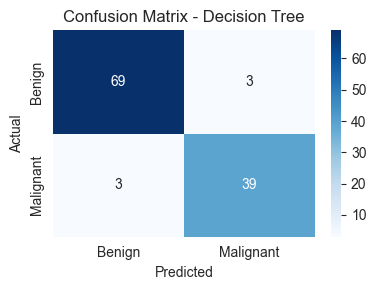

📊 Classification Report - Decision Tree
Accuracy: 0.9473684210526315
              precision    recall  f1-score   support

      Benign       0.96      0.96      0.96        72
   Malignant       0.93      0.93      0.93        42

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

---------------------------------------------------



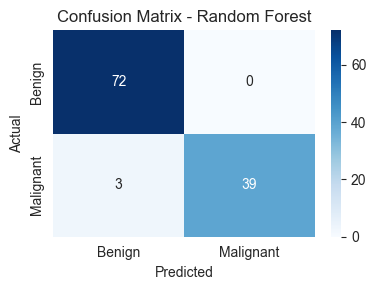

📊 Classification Report - Random Forest
Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

      Benign       0.96      1.00      0.98        72
   Malignant       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

---------------------------------------------------



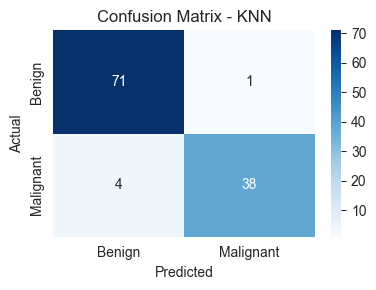

📊 Classification Report - KNN
Accuracy: 0.956140350877193
              precision    recall  f1-score   support

      Benign       0.95      0.99      0.97        72
   Malignant       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

---------------------------------------------------



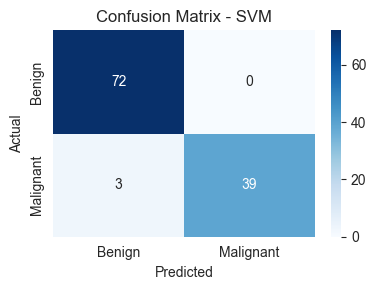

📊 Classification Report - SVM
Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

      Benign       0.96      1.00      0.98        72
   Malignant       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

---------------------------------------------------



In [43]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# List of model names
model_names = ["Logistic Regression", "Decision Tree", "Random Forest", "KNN", "SVM"]

# Plot confusion matrix for each model
for name in model_names:
    model = models[name]
    y_pred = model.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

    # Metrics
    print(f"📊 Classification Report - {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))
    print("---------------------------------------------------\n")


In [44]:
# Example custom input (must match the feature count of X)
custom_input = [[14.2, 20.2, 92.4, 500.5, 0.1, 0.2, 0.3, 0.05, 0.2, 0.07,
                 0.3, 1.2, 2.5, 30.0, 0.005, 0.02, 0.04, 0.01, 0.01, 0.004,
                 16.0, 30.0, 100.0, 800.0, 0.15, 0.3, 0.4, 0.1, 0.25, 0.09]]

# Convert to DataFrame with correct column names
custom_df = pd.DataFrame(custom_input, columns=X.columns)

# Scale the custom input
scaled_input = scaler.transform(custom_df)

# Predict
prediction = best_model.predict(scaled_input)

# Print result
if prediction[0] == 1:
    print("Prediction: 🔴 Malignant (Cancerous Tumor)")
else:
    print("Prediction: 🟢 Benign (Non-cancerous Tumor)")


Prediction: 🔴 Malignant (Cancerous Tumor)


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize empty dictionary
prediction = {}

for name, model in models.items():
    y_prediction = model.predict(X_test)
    prediction[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }


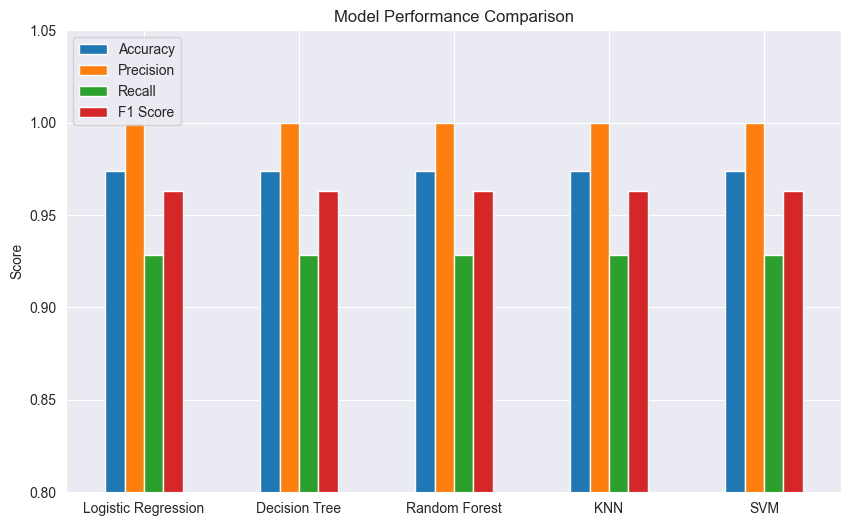

In [16]:
# Convert to DataFrame
metrics_df = pd.DataFrame({
    model: {
        k: v for k, v in result.items() if k in ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    } for model, result in prediction.items()
}).T

# Plot
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0.8, 1.05)
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(loc='upper left')
plt.show()


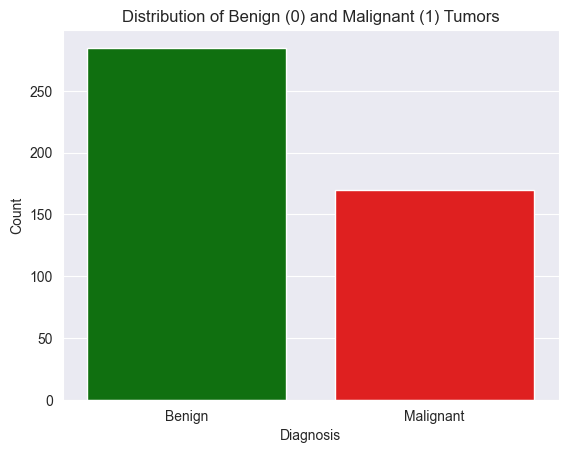

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert y to a DataFrame to use as 'hue'
sns.countplot(x=y_train, hue=y_train, palette={0: 'green', 1: 'red'}, legend=False)
plt.title('Distribution of Benign (0) and Malignant (1) Tumors')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.show()
